In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import momepy
import networkx as nx
import numpy
from contextily import add_basemap
from libpysal import weights

In [ ]:
# https://networkx.org/documentation/stable/auto_examples/geospatial/plot_lines.html
roads = gpd.read_file('road_vertices_split.zip').to_crs(epsg=3857)

G = momepy.gdf_to_nx(roads, approach="primal")

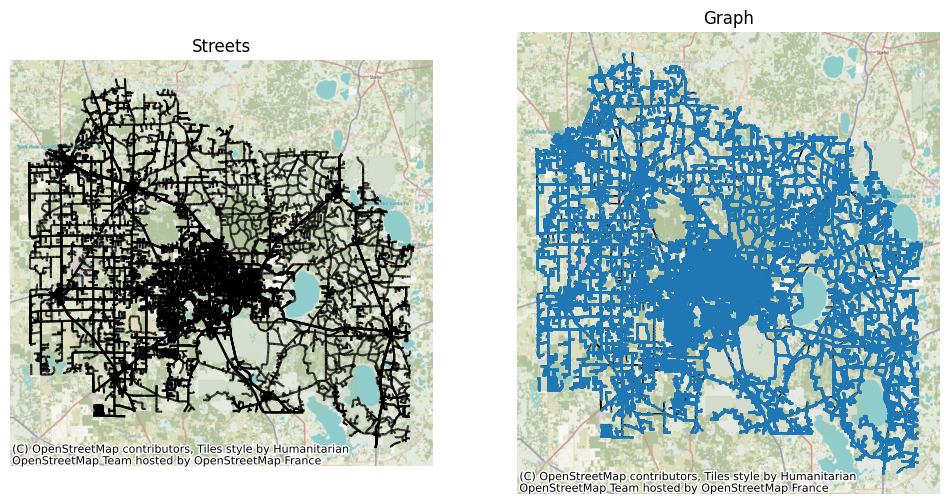

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
roads.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
    try:  # For issues with downloading/parsing in CI
        add_basemap(facet)
    except:
        pass
nx.draw(
    G, {n: [n[0], n[1]] for n in list(G.nodes)}, ax=ax[1], node_size=1
)